# <div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: Preprocessing and EDA for Test Set </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Name: Ali Razi**

**Contact: ali.razi9292@gmail.com**

**Date: 08-09-2023**

---

**Main Objective** Using machine learning estimate size of tumors in breast cancer patients to provide the practitioners and patients better vision of their cancers stages.

In this notebook it is aimed to focus on preprocessing and EDA for test set. After having perspective of data frame, in this notebook we can run certain steps of cleanign data and scaling of it.


# Notebook Content 


- Geneal Information of Train Set 
- EDA
     - Modifying duplicated data
     - Encoding Categorical varaibles
     - Checking randomness of classes in the set
     - Resize
     - Agument
     - Denoised
     - Blanaced
     - Converting to numppy array

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import os
import pathlib
import random
import cv2

# Basic information about Test Set  

In [2]:
path_test = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test"
data_test_dir = pathlib.Path(path_test)

In [3]:
class_names = np.array(sorted([item.name for item in data_test_dir.glob("*")]))
class_names

array(['.DS_Store', 'augmented_benign', 'augmented_malignant', 'benign',
       'malignant', 'resized_benign', 'resized_malignant'], dtype='<U19')

In [4]:
# Count the total rows for both the benign and malignant image directories

from PIL import Image
import os

def count_rows(directory, file_extensions):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(file_extensions)]
    total_rows = 0

    for image_path in image_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            total_rows += height

    return total_rows

directory_benign = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign"
directory_malignant = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant"
file_extensions = (".png", ".jpg") 


rows_benign = count_rows(directory_benign, file_extensions)
rows_malignant = count_rows(directory_malignant, file_extensions)


print("Benign Images:")
print(f"Total Rows: {rows_benign}")

print("\nMalignant Images:")
print(f"Total Rows: {rows_malignant}")

Benign Images:
Total Rows: 854298

Malignant Images:
Total Rows: 995638


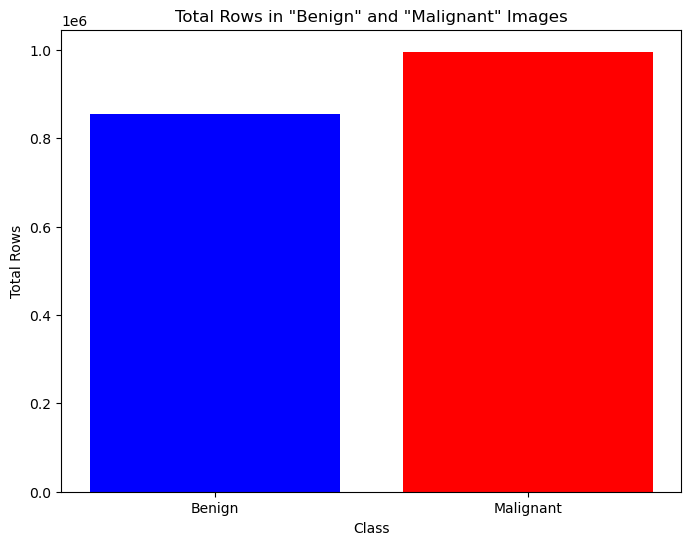

In [5]:
# Create a bar chart

import matplotlib.pyplot as plt

total_rows_benign = 854298
total_rows_malignant = 995638

class_names = ["Benign", "Malignant"]

total_rows = [total_rows_benign, total_rows_malignant]


plt.figure(figsize=(8, 6))
plt.bar(class_names, total_rows, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Total Rows')
plt.title('Total Rows in "Benign" and "Malignant" Images')
plt.show()


In [6]:
# Calculate the percentage of benign and malignant images

import os

def count_images_in_folder(folder_path):
    num_images = 0
    for image_file in os.listdir(folder_path):
        if image_file.endswith((".png", ".jpg")):
            num_images += 1
    return num_images

benign_folder = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign"
malignant_folder = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant"

total_benign_images = count_images_in_folder(benign_folder)
total_malignant_images = count_images_in_folder(malignant_folder)

total_images = total_benign_images + total_malignant_images


percent_benign = (total_benign_images / total_images) * 100
percent_malignant = (total_malignant_images / total_images) * 100

print("Percentage of benign images: {:.2f}%".format(percent_benign))
print("Percentage of malignant images: {:.2f}%".format(percent_malignant))

Percentage of benign images: 46.17%
Percentage of malignant images: 53.83%


In [7]:
Count_Imag = len(list(data_dir.glob('*/*.png')))
Count_Imag

8158

In [8]:
Count_Imag = len(list(data_dir.glob('*/*.jpg')))
Count_Imag

94

In [9]:
from PIL import Image

def count_rows(directory):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".png")]
    total_rows = 0
    
    for image_path in image_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            total_rows += height
    
    return total_rows

directory_benign = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign"
directory_malignant = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant"

rows_benign = count_rows(directory_benign)

rows_malignant = count_rows(directory_malignant)

print("Benign Images:")
print(f"Total Rows: {rows_benign}")

print("\nMalignant Images:")
print(f"Total Rows: {rows_malignant}")

Benign Images:
Total Rows: 833242

Malignant Images:
Total Rows: 995638


In [10]:
def count_images_in_folder(folder_path):
    num_images = 0
    for image_file in os.listdir(folder_path):
        num_images += 1
    return num_images

total_benign_images = count_images_in_folder(benign_folder)
total_malignant_images = count_images_in_folder(malignant_folder)

# Calculate the total number of images
total_images = total_benign_images + total_malignant_images


percent_benign = (total_benign_images / total_images) * 100
percent_malignant = (total_malignant_images / total_images) * 100

print(f"\nPercentage of benign images: {percent_benign:.2f}%")
print(f"Percentage of malignant images: {percent_malignant:.2f}%")


Percentage of benign images: 46.17%
Percentage of malignant images: 53.83%


In [11]:
import os

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

def count_files_in_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return 0
    
    # List all files in the folder
    files = os.listdir(folder_path)
    return len(files)

# Calculate the sizes for benign and malignant folders
benign_size = count_files_in_folder(benign_folder)
malignant_size = count_files_in_folder(malignant_folder)

print(f"Number of files in 'benign' folder: {benign_size}")
print(f"Number of files in 'malignant' folder: {malignant_size}")

Number of files in 'benign' folder: 3811
Number of files in 'malignant' folder: 4443


In [12]:
import os
from PIL import Image

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

def get_image_sizes_in_folder(folder_path):
    widths = []
    heights = []
    
    # Loop through the images in the folder
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            widths.append(width)
            heights.append(height)
        except Exception as e:
            print(f"Error processing '{image_path}': {e}")
    
    return widths, heights

# Get image resolutions for 'benign' folder
benign_widths, benign_heights = get_image_sizes_in_folder(benign_folder)

# Get image resolutions for 'malignant' folder
malignant_widths, malignant_heights = get_image_sizes_in_folder(malignant_folder)

# Calculate statistics about image resolutions for 'benign' folder
min_benign_width = min(benign_widths)
max_benign_width = max(benign_widths)
mean_benign_width = sum(benign_widths) / len(benign_widths)
median_benign_width = sorted(benign_widths)[len(benign_widths) // 2]

min_benign_height = min(benign_heights)
max_benign_height = max(benign_heights)
mean_benign_height = sum(benign_heights) / len(benign_heights)
median_benign_height = sorted(benign_heights)[len(benign_heights) // 2]

# Calculate statistics about image resolutions for 'malignant' folder
min_malignant_width = min(malignant_widths)
max_malignant_width = max(malignant_widths)
mean_malignant_width = sum(malignant_widths) / len(malignant_widths)
median_malignant_width = sorted(malignant_widths)[len(malignant_widths) // 2]

min_malignant_height = min(malignant_heights)
max_malignant_height = max(malignant_heights)
mean_malignant_height = sum(malignant_heights) / len(malignant_heights)
median_malignant_height = sorted(malignant_heights)[len(malignant_heights) // 2]

# Print the statistics for 'benign' folder
print("Statistics for 'benign' folder:")
print(f"Minimum Width: {min_benign_width}")
print(f"Maximum Width: {max_benign_width}")
print(f"Mean Width: {mean_benign_width:.2f}")
print(f"Median Width: {median_benign_width}")
print(f"Minimum Height: {min_benign_height}")
print(f"Maximum Height: {max_benign_height}")
print(f"Mean Height: {mean_benign_height:.2f}")
print(f"Median Height: {median_benign_height}")

# Print the statistics for 'malignant' folder
print("\nStatistics for 'malignant' folder:")
print(f"Minimum Width: {min_malignant_width}")
print(f"Maximum Width: {max_malignant_width}")
print(f"Mean Width: {mean_malignant_width:.2f}")
print(f"Median Width: {median_malignant_width}")
print(f"Minimum Height: {min_malignant_height}")
print(f"Maximum Height: {max_malignant_height}")
print(f"Mean Height: {mean_malignant_height:.2f}")
print(f"Median Height: {median_malignant_height}")


Error processing '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store': cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store'
Error processing '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store': cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store'
Statistics for 'benign' folder:
Minimum Width: 224
Maximum Width: 227
Mean Width: 224.23
Median Width: 224
Minimum Height: 224
Maximum Height: 227
Mean Height: 224.23
Median Height: 224

Statistics for 'malignant' folder:
Minimum Width: 224
Maximum Width: 227
Mean Width: 224.14
Median Width: 224
Minimum Height: 224
Maximum Height: 227
Mean Height: 224.14
Median Height: 224


# EDA 

# Cleaning The Data

For having better vision and perspective of data it woulb better to do sanity check and modify data. There are several key steps that for machine learning sanity chehck and data modification befire EDA is needed:

                                    1. Validity 
                                    2. Accuracy
                                    3.Completness
                                    4.Consistency
                                    5.Uniformity

In [15]:
from PIL import Image
import os

# Define the paths to the folders containing images
benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

# Function to read images from a folder
def read_images_from_folder(folder_path):
    image_list = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    image_list.append(img.copy())  # Create a copy of the image to avoid issues with file closing
            except Exception as e:
                print(f"Error reading image: {file_path}, {e}")
    return image_list

# Read images from the benign and malignant folders
benign_images = read_images_from_folder(benign_folder)
malignant_images = read_images_from_folder(malignant_folder)

# Check if images were successfully loaded
if len(benign_images) > 0:
    # Display the first image from the list
    benign_images[0].show()
else:
    print("No images found in the benign folder.")

if len(malignant_images) > 0:
    # Display the first image from the list
    malignant_images[0].show()
else:
    print("No images found in the malignant folder.")

Error reading image: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store, cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store'
Error reading image: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store, cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store'


In [17]:
import os
import hashlib

def find_duplicates(folder_path):
    duplicates = {}
    for root, _, files in os.walk(folder_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                file_hash = hashlib.md5(file.read()).hexdigest()
            if file_hash in duplicates:
                duplicates[file_hash].append(file_path)
            else:
                duplicates[file_hash] = [file_path]
    
    return duplicates

def remove_duplicates(folder_path):
    duplicates = find_duplicates(folder_path)
    for duplicate_list in duplicates.values():
        if len(duplicate_list) > 1:
            # Keep the first file and remove the duplicates
            for file_path in duplicate_list[1:]:
                os.remove(file_path)
                print(f"Removed duplicate file: {file_path}")

if __name__ == "__main__":
    benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
    malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

    print("Removing duplicates from the 'benign' folder:")
    remove_duplicates(benign_folder)

    print("Removing duplicates from the 'malignant' folder:")
    remove_duplicates(malignant_folder)

Removing duplicates from the 'benign' folder:
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (272)-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (48)-rotated2-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (261)-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (142)-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (16)-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/benign (242)-rotated1-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultraso

Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (131)-sharpened-rotated2.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (201)-sharpened.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (31)-rotated32-rotated2.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (49)-rotated32.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (62)-sharpened-rotated1.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/malignant (2)-rotated1-rotated1.png
Removed duplicate file: /Users/alirazi/BreastCancerUltrasound/data/ult

Displaying an ultrasound image from the 'benign' folder:


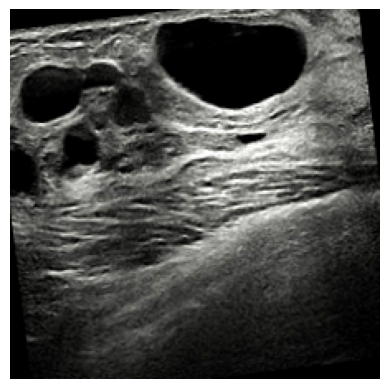

Displaying an ultrasound image from the 'malignant' folder:


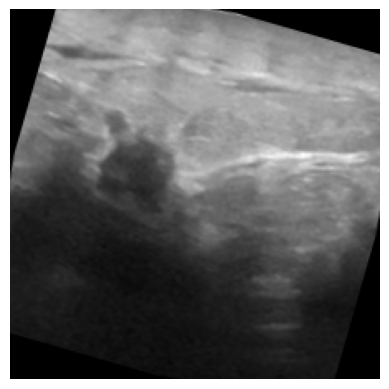

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_ultrasound_image_from_folder(folder_path):
    try:
        # Get a list of all files in the folder
        file_list = os.listdir(folder_path)

        # Find the first image file (assuming it's in JPG format, modify if necessary)
        image_file = next((file for file in file_list if file.lower().endswith('.png')), None)

        if image_file is not None:
            image_path = os.path.join(folder_path, image_file)
            img = mpimg.imread(image_path)
            plt.imshow(img, cmap='gray')
            plt.axis('off')  # Turn off axis labels
            plt.show()
        else:
            print("No image files (JPG format) found in the folder.")
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
    malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

    print("Displaying an ultrasound image from the 'benign' folder:")
    display_ultrasound_image_from_folder(benign_folder)

    print("Displaying an ultrasound image from the 'malignant' folder:")
    display_ultrasound_image_from_folder(malignant_folder)

**1.Validity:**

    - To check the validity of data(PNG), it needs to go through several steps, the following will take care of 
      datas' validity

- Simply we can check how many data are labaled in each category of 'bening' and 'malignant'.


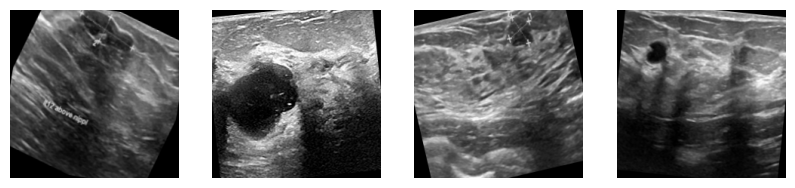

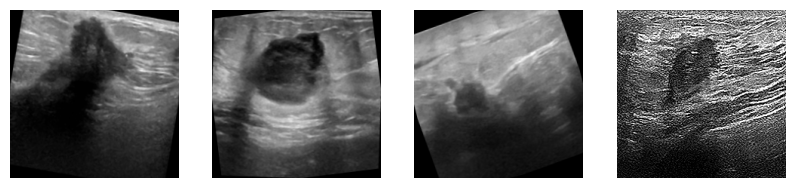

In [19]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display sample images from a folder
def display_sample_images(folder_path, num_samples=4, random_seed=None):
    image_files = os.listdir(folder_path)
    random.seed(random_seed)
    selected_files = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(10, 6))
    for i, file in enumerate(selected_files):
        plt.subplot(1, num_samples, i+1)
        img = mpimg.imread(os.path.join(folder_path, file))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Folders containing image files
benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

# Display sample images from 'benign' and 'malignant' folders
display_sample_images(benign_folder, num_samples=4, random_seed=42)
display_sample_images(malignant_folder, num_samples=4, random_seed=42)


Error processing '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store': cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign/.DS_Store'
Error processing '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store': cannot identify image file '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/.DS_Store'


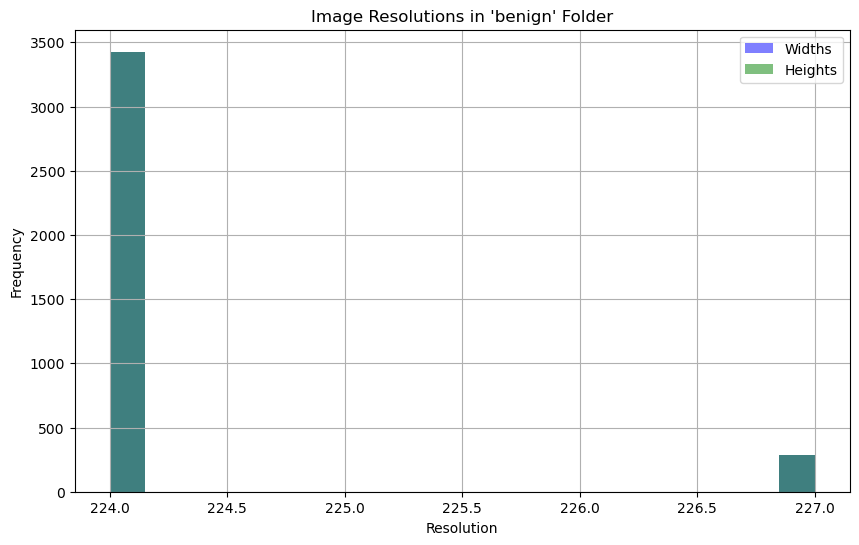

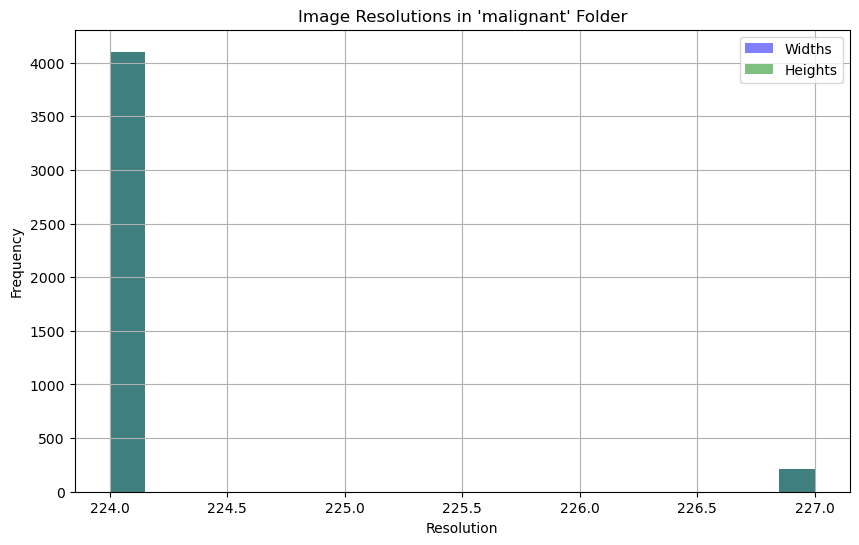

In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant'

def get_image_sizes_in_folder(folder_path):
    widths = []
    heights = []
    
    # Loop through the images in the folder
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            widths.append(width)
            heights.append(height)
        except Exception as e:
            print(f"Error processing '{image_path}': {e}")
    
    return widths, heights

# Get image resolutions for 'benign' folder
benign_widths, benign_heights = get_image_sizes_in_folder(benign_folder)

# Get image resolutions for 'malignant' folder
malignant_widths, malignant_heights = get_image_sizes_in_folder(malignant_folder)

# Plot histograms for 'benign' folder
plt.figure(figsize=(10, 6))
plt.hist(benign_widths, bins=20, alpha=0.5, color='blue', label='Widths')
plt.hist(benign_heights, bins=20, alpha=0.5, color='green', label='Heights')
plt.xlabel("Resolution")
plt.ylabel("Frequency")
plt.title("Image Resolutions in 'benign' Folder")
plt.legend()
plt.grid(True)
plt.show()

# Plot histograms for 'malignant' folder
plt.figure(figsize=(10, 6))
plt.hist(malignant_widths, bins=20, alpha=0.5, color='blue', label='Widths')
plt.hist(malignant_heights, bins=20, alpha=0.5, color='green', label='Heights')
plt.xlabel("Resolution")
plt.ylabel("Frequency")
plt.title("Image Resolutions in 'malignant' Folder")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from PIL import Image
import os

desired_width = 300
desired_height = 200

def resize_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/benign"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_benign/"
resize_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_malignant/"
resize_images(input_malignant_directory, output_malignant_directory)

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_5045/3378081276.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


Random sample from the 'benign' class:


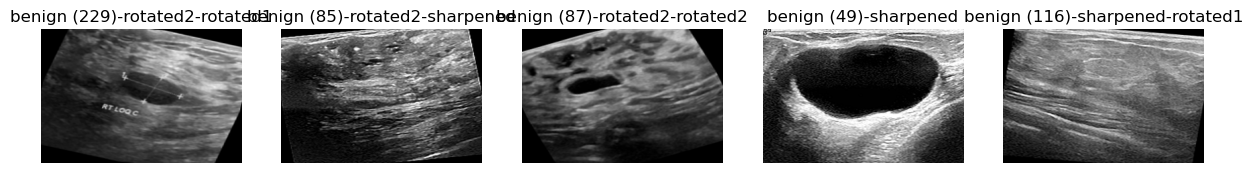


Random sample from the 'malignant' class:


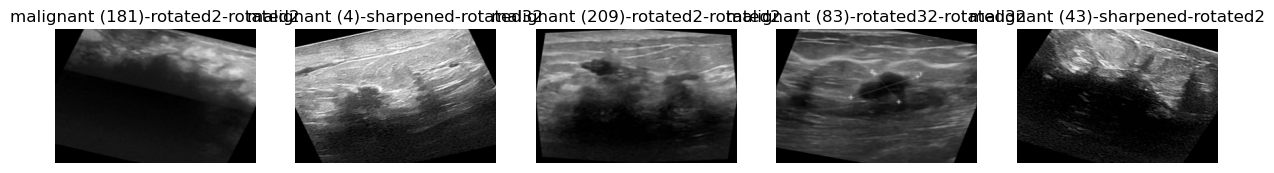

In [25]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_sample(folder_path, num_samples=5):
    image_files = os.listdir(folder_path)
    random_samples = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random_samples):
        image_path = os.path.join(folder_path, filename)
        image = mpimg.imread(image_path)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(filename.split('.')[0])
        plt.axis('off')
    
    plt.show()

resized_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_benign/"
resized_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_malignant/"

num_samples_to_display = 5
print("Random sample from the 'benign' class:")
display_random_sample(resized_benign_directory, num_samples_to_display)

print("\nRandom sample from the 'malignant' class:")
display_random_sample(resized_malignant_directory, num_samples_to_display)

In [29]:
from PIL import Image, ImageOps
import os

desired_width = 300
desired_height = 200

def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

            for angle in [90, 180, 270]:  
                rotated_image = resized_image.rotate(angle)
                rotated_output_path = os.path.join(output_dir, f"rotated_{angle}_{filename}")
                rotated_image.save(rotated_output_path)

            flipped_image = ImageOps.flip(resized_image)  
            flipped_output_path = os.path.join(output_dir, f"flipped_{filename}")
            flipped_image.save(flipped_output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_benign/"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_benign/"
augment_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/resized_malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_malignant/"
augment_images(input_malignant_directory, output_malignant_directory)

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_5045/1681104154.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


In [30]:
import os

def count_images_in_folder(folder_path):
    num_images = len([filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")])
    return num_images

augmented_benign_directory =    "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_benign/"
agumented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_malignant/"
num_benign_images = count_images_in_folder(augmented_benign_directory)
num_malignant_images = count_images_in_folder(agumented_malignant_directory)

print(f"Number of images in the 'benign' class: {num_benign_images}")
print(f"Number of images in the 'malignant' class: {num_malignant_images}")

Number of images in the 'benign' class: 18565
Number of images in the 'malignant' class: 21560


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define your directory paths
augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_malignant/"

# Function to normalize image data
def normalize_image(img):
    img = img.astype('float32')
    img /= 255.0  # Normalize pixel values to [0, 1]
    return img

# Load and normalize images from a directory
def load_and_normalize_images(directory):
    image_list = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=(224, 224))  # Change target_size as needed
        img_array = img_to_array(img)
        normalized_img = normalize_image(img_array)
        image_list.append(normalized_img)
    return np.array(image_list)

# Load and normalize augmented benign and malignant images
augmented_benign_normalized = load_and_normalize_images(augmented_benign_directory)
augmented_malignant_normalized = load_and_normalize_images(augmented_malignant_directory)


In [4]:
import os
import cv2
import numpy as np

# Define your directory paths
augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/augmented_malignant/"

# Function to apply noise reduction using Gaussian blur
def apply_gaussian_blur(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

# Function to apply noise reduction using median filtering
def apply_median_filter(image):
    median_filtered = cv2.medianBlur(image, 5)
    return median_filtered

# Process images in the specified directory with noise reduction
def process_images_with_noise_reduction(directory, output_directory, noise_reduction_func):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        image = cv2.imread(img_path)
        
        # Apply noise reduction function
        denoised_image = noise_reduction_func(image)
        
        # Save the denoised image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, denoised_image)

# Apply noise reduction to augmented benign images
process_images_with_noise_reduction(augmented_benign_directory, "denoised_benign", apply_gaussian_blur)

# Apply noise reduction to augmented malignant images
process_images_with_noise_reduction(augmented_malignant_directory, "denoised_malignant", apply_median_filter)


In [5]:
import os
import shutil

# Define your directory paths
denoised_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/denoised_benign/"
denoised_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/denoised_malignant/"

# Define the output directories for balanced data
balanced_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced_benign/"
balanced_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced_malignant/"

# Create the balanced directories if they don't exist
if not os.path.exists(balanced_benign_directory):
    os.makedirs(balanced_benign_directory)

if not os.path.exists(balanced_malignant_directory):
    os.makedirs(balanced_malignant_directory)

# Count the number of images in each class
num_benign_images = len(os.listdir(denoised_benign_directory))
num_malignant_images = len(os.listdir(denoised_malignant_directory))

# Determine the oversampling ratio
oversampling_ratio = num_malignant_images // num_benign_images

# Copy augmented benign images to balanced benign directory (oversampling)
for filename in os.listdir(denoised_benign_directory):
    src_path = os.path.join(denoised_benign_directory, filename)
    dst_path = os.path.join(balanced_benign_directory, filename)
    shutil.copy(src_path, dst_path)

# Copy augmented malignant images to balanced malignant directory
for filename in os.listdir(denoised_malignant_directory):
    src_path = os.path.join(denoised_malignant_directory, filename)
    dst_path = os.path.join(balanced_malignant_directory, filename)
    shutil.copy(src_path, dst_path)

In [1]:
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array, array_to_img
import os

balanced_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/"
balanced_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/"

# Function to process images in a directory
def process_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming the images are in JPG format
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            
            # Print image details
            print("Image details:")
            print("Type:", type(img))
            print("Format:", img.format)
            print("Mode:", img.mode)
            print("Size:", img.size)
            
            # Convert the given image into a numpy array
            img_numpy_array = img_to_array(img)
            print("\nImage is converted to a NumPy array:")
            print("Type:", type(img_numpy_array))
            print("dtype:", img_numpy_array.dtype)
            print("shape:", img_numpy_array.shape)
            
            # Convert back to image
            img_pil_from_numpy_array = array_to_img(img_numpy_array)
            print("\nConverting NumPy array back to image:")
            print("Type:", type(img_pil_from_numpy_array))
            print("-----------------------------")

# Process images in the balanced benign directory
print("Processing images in balanced benign directory:")
process_images(balanced_benign_directory)

# Process images in the balanced malignant directory
print("Processing images in balanced malignant directory:")
process_images(balanced_malignant_directory)


2023-08-15 14:24:22.555634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Processing images in balanced benign directory:
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dt

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Forma

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Forma

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Forma

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Forma


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
-----------------------------
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dt

In [6]:
path_test_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced"
data_test_eda_dir = pathlib.Path(path_test_eda)

- Defining varaibles:

In [7]:
x_test_eda_dir = os.path.join(data_test_eda_dir, 'test')
y_test_eda_dir = os.path.join(data_test_eda_dir, 'testannot')

# Conclusion 

The test set after after applying several steps such as balancing or resizng is modified and cleaned. The test varaibles also for the modeling is already defined and ready for the modeling step.